#Cover Page

**Developed by:**

**Mohamed Waled - 41810162**

#Import the dataset from drive

In [ ]:
!gdown --id 1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8

Downloading...
From: https://drive.google.com/uc?id=1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 55.5MB/s]


#Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

# show how the data looks like

In [ ]:
data = pd.read_csv('winequality-white.csv',sep=';')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data['quality label'] = data['quality'].apply(lambda x: 1 if x<=5 else 2 if x<=7 else 3)
print(data[['quality','quality label']].value_counts().sort_index())
data.head()

quality  quality label
3        1                  20
4        1                 163
5        1                1457
6        2                2198
7        2                 880
8        3                 175
9        3                   5
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


#Normalization

In [ ]:
# df = data.drop('Type', axis=1)
# df_norm = (df-df.min())/(df.max()-df.min())
# df_norm = pd.concat((df_norm, data.Type), 1)
# df_norm.head()

#Start Split the data and train

In [ ]:
X = data.drop('quality',axis=1)
y = data['quality']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0, stratify=data['quality label'])
print(len(X_train), "train +", len(X_test), "valid")

(4898, 12)
(4898,)
3918 train + 980 valid


#Using Random_Forest for trainning 

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   6,   0,   0,   0,   0],
       [  0,   7,  24,   0,   0,   0,   0],
       [  0,   0, 291,   0,   0,   0,   0],
       [  0,   0,   0, 406,  27,   0,   0],
       [  0,   0,   0,  91,  92,   0,   0],
       [  0,   0,   0,   0,   0,  35,   0],
       [  0,   0,   0,   0,   0,   1,   0]])

Text(33.0, 0.5, 'Truth')

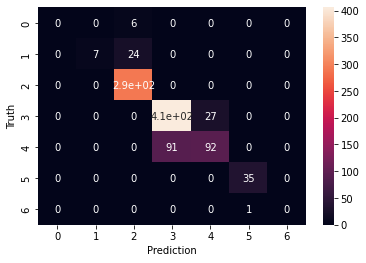

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Accuracy** 

In [ ]:
var="%"
print("Accuracy: %0.1f" % (model.score(X_test,y_test)*100), var[0])

Accuracy: 84.8 %


#find the mean square error

In [ ]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.41280523647999684

In [ ]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.15816326530612246

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.23      0.37        31
           5       0.91      1.00      0.95       291
           6       0.82      0.94      0.87       433
           7       0.77      0.50      0.61       183
           8       0.97      1.00      0.99        35
           9       0.00      0.00      0.00         1

    accuracy                           0.85       980
   macro avg       0.64      0.52      0.54       980
weighted avg       0.84      0.85      0.83       980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
